In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import PIL.Image

from cifar_batch import Cifar10Batch
from models import SmallResNet
from utils import read_in_dict, read_labs, get_pics_preds, softmax, get_sorted_ser

from dataset import Pipeline, Dataset, DatasetIndex, B, V, C, F
from dataset.dataset.models.tf import TFModel

In [2]:
%matplotlib inline

In [3]:
# size of cifar-10
SIZE = 50000

In [4]:
# setting up the index and the dataset
index = DatasetIndex(np.arange(SIZE))
cifarset = Dataset(index=index, batch_class=Cifar10Batch)
cifarset.cv_split(0.9)

In [5]:
# read cifar-10 dataset in dict
datadict = read_in_dict(src='D:/Work/OpenData/', components=['images', 'labels', 'picnames'])

In [6]:
testbatch = (cifarset.test.p.load(fmt='ndarray', src=datadict)
             #.shift_pic(max_shift=10)
             .next_batch(500))

### Cats & Dogs from CIFAR-10

* 50000 training examples, 10 classes

In [7]:
# labels
read_labs()

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

* Task: predict prob of each class for a pic

In [ ]:
num_pic = 3
itms[num_pic][2]

### Training pipe

In [8]:
train_ppl = (Pipeline()
             .load(fmt='ndarray', src=datadict)
             .init_model('static', SmallResNet, 'smallnet',
                         config=dict(pic_shape=(32, 32), n_channels=3, n_classes=10, loss='ce'))
             .shift_pic(max_shift=4)
             .train_model('smallnet', feed_dict={'images': B('images'), 'targets': B('labels')})
             )

In [9]:
cifarpipe = ((cifarset.train >> train_ppl)
             .init_variable('accuracy', init=list)
             .predict_model('smallnet', feed_dict={'images': testbatch.images, 'targets': testbatch.labels},
                            fetches='accuracy', append_to=V('accuracy'))
            )

### Train and save the model

In [10]:
gen = cifarpipe.gen_batch(batch_size=100, n_epochs=None)

In [19]:
N_ITERS = 1000

In [ ]:
for i in tqdm(range(N_ITERS)):
    next(gen)
    if i % 100 == 0:
        print(cifarpipe.get_variable('accuracy')[-1])

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

0.838


 10%|███████▉                                                                       | 100/1000 [00:33<04:58,  3.01it/s]

0.826


 20%|███████████████▊                                                               | 200/1000 [01:06<04:26,  3.00it/s]

0.832


 30%|███████████████████████▋                                                       | 300/1000 [01:39<03:52,  3.02it/s]

0.838


 40%|███████████████████████████████▌                                               | 400/1000 [02:13<03:18,  3.02it/s]

0.834


 45%|███████████████████████████████████▋                                           | 452/1000 [02:30<03:06,  2.93it/s]

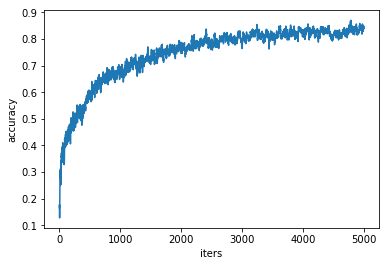

In [18]:
accs = cifarpipe.get_variable('accuracy')

plt.plot(accs)
plt.xlabel('iters')
plt.ylabel('accuracy')
plt.show()

In [ ]:
help(np.pad)

In [ ]:
np.random.randint(0, 2, (3, 4))

In [ ]:
model = cifarpipe.get_model_by_name('smallnet')

In [ ]:
model.get_number_of_trainable_vars()

In [ ]:
model.save(path='D:\Work\saved_model\cifar\smallres')

### Load saved

In [ ]:
pipeload = (cifarset.test.p
             .init_variable('accuracy', init=list)
             .load(fmt='ndarray', src=datadict)
             .init_model('static', TFModel, 'resnet', config=dict(build=False, load=True, graph='model-4000.meta',
                                                                      path='D:\Work\saved_model\cifar\smallres'))
             .predict_model('resnet', feed_dict={'images': testbatch.images, 'targets': testbatch.labels},
                            fetches='accuracy', append_to=V('accuracy'))
           )

In [ ]:
model = pipeload.get_model_by_name('resnet')

### See results

In [ ]:
p, l, pics = get_pics_preds(model, testbatch, size=(200, 200))

In [ ]:
itms = list(zip(p, l, pics))

In [ ]:
num_pic = 18
get_sorted_ser(itms[num_pic])[:3]

In [ ]:
itms[num_pic][2]

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
x = tf.constant(np.arange(100).reshape(5, 10, 2) * 1.0, shape=(5, 10, 2))

In [ ]:
sess = tf.Session()

In [ ]:
sess.run(tf.reduce_mean(x, axis=(1, 2)))